# Seaborn  tutorial 
- a simple notebook to practice working with seaborn library and its visualization methods 

## 1- Distribution plots
distribution plots to show a distribution over a dataset :
  - distplot
  - joinplot
  - pairplot 
  - rugplot
  - kde plot

In [1]:
# importing libraries 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

## Data 
seaborn has some built-in datasets

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot
- shows the distribution of univariate set of information 

C:\Users\eslam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

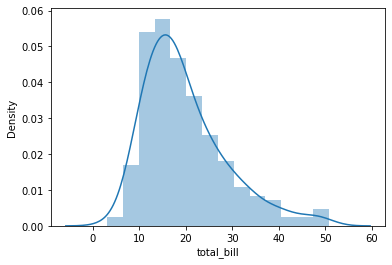

In [3]:
sns.distplot(tips["total_bill"])

C:\Users\eslam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip'>

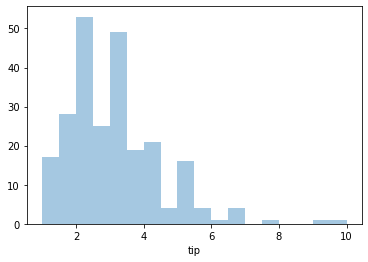

In [4]:
sns.distplot(tips["tip"], kde = False) # only histogram

C:\Users\eslam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

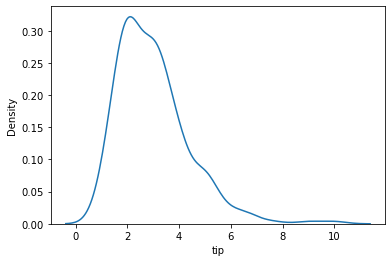

In [5]:
sns.distplot(tips["tip"], hist = False) # only kde 

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## jointplot 
jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with:
* "scatter"
* reg 
* reside
* kde
* hex

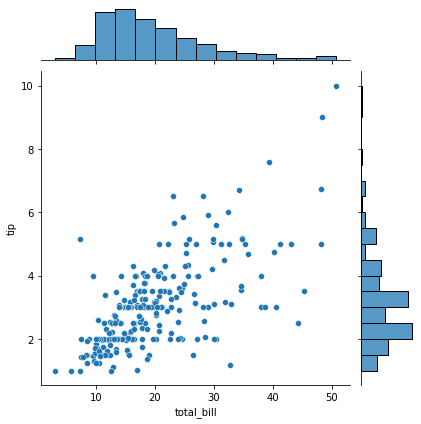

In [7]:
sns.jointplot(data = tips, x = "total_bill" , y= "tip" )
plt.show()

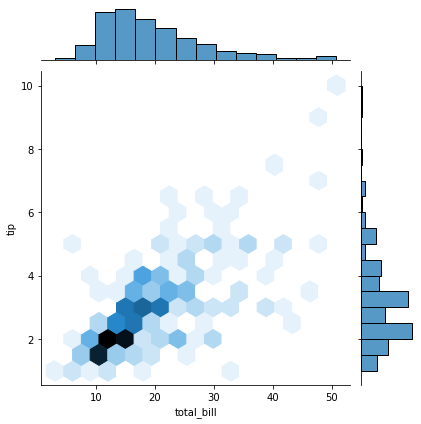

In [8]:
sns.jointplot(data = tips , x= "total_bill" , y= "tip", kind = "hex")

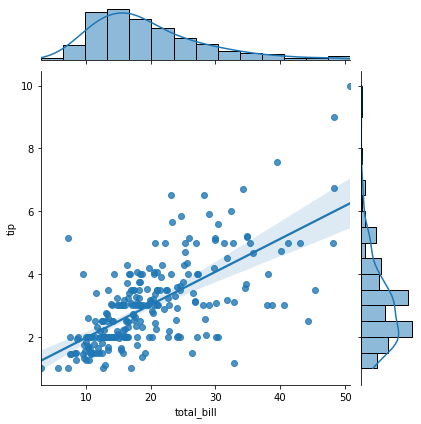

In [15]:
# reg plot line 
sns.jointplot(data= tips, x= "total_bill", y= "tip", kind = "reg")

## Pair plot
- pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

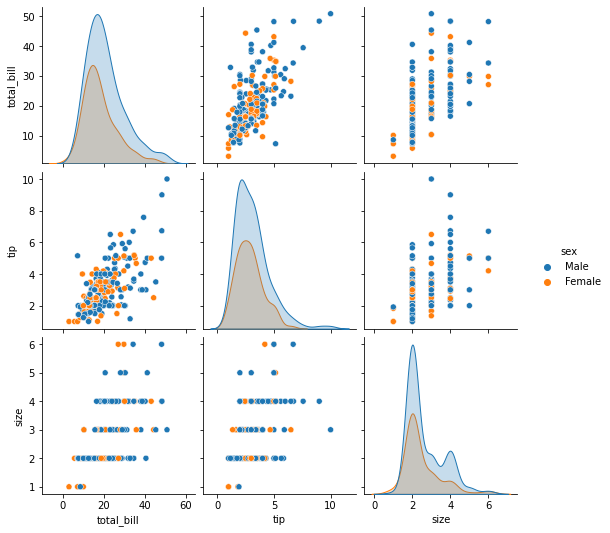

In [26]:
sns.pairplot(tips, hue = "sex" , diag_kind= "auto")

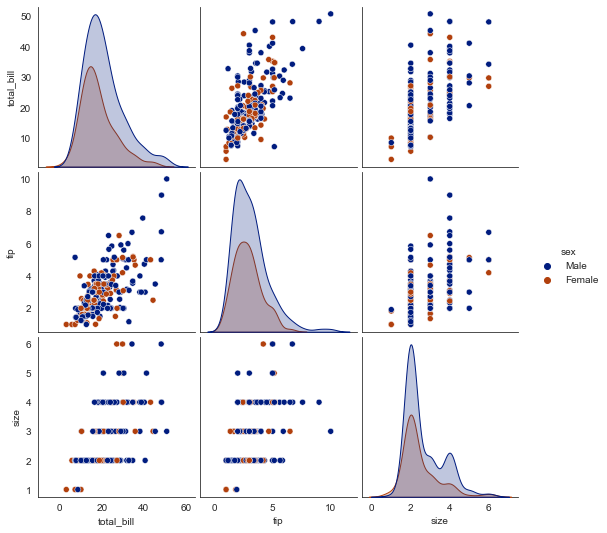

In [38]:
# styling with plots using palette first here
sns.set_style(style = "white")
sns.pairplot(data = tips , hue = "sex" , palette= "dark")


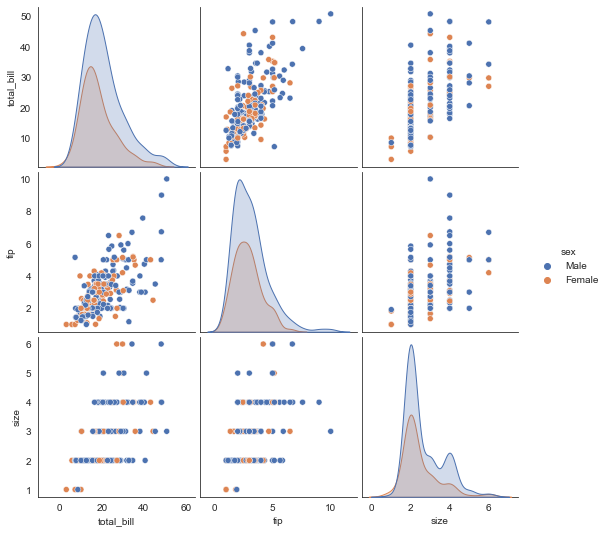

In [42]:
sns.set_style(style = "white")
sns.pairplot(tips, hue = "sex" , palette= "deep")  # palette = deep , dark colorblind .....

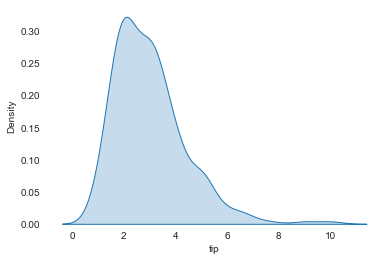

In [51]:
# another way to show the distribution of a column over a column 
sns.kdeplot(tips["tip"], shade = True ,palette = "colorblind" )
sns.despine(left = True, bottom = True)


## categorical plots
* catplot 
* boxplot
* violinplot 
* stripplot
* swarmplot
* barplot
* ountplot

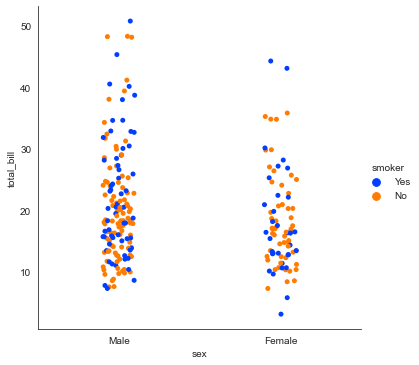

In [138]:
# factorplot 
sns.catplot(data= tips, x= "sex", y = "total_bill", hue = "smoker", palette= "bright")

C:\Users\eslam\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


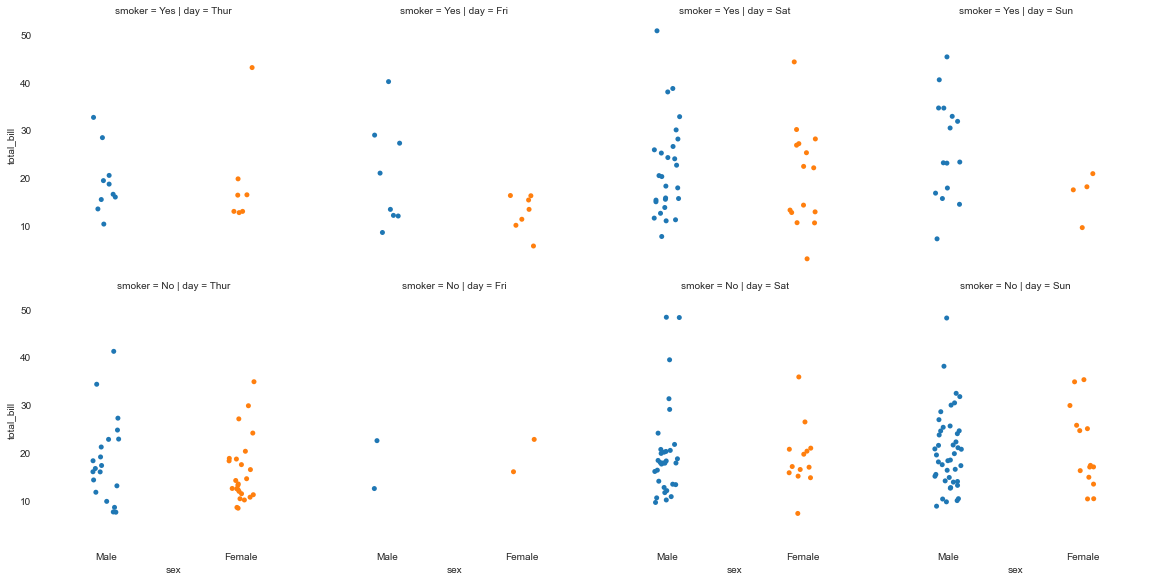

In [144]:
# conditional plots more than one condition 
sns.set_style(style = "white")
# catplot
sns.catplot(data= tips, x = "sex", y = "total_bill" , row = "smoker", col = "day",size = 4)
sns.despine(left =True, bottom =True)

## Barplot and countplot
- deals with aggregation function by default is the mean hich means that it describe aggregation estimator (mean)

In [154]:
# here is the value of the aggregation
tips.groupby("sex").mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


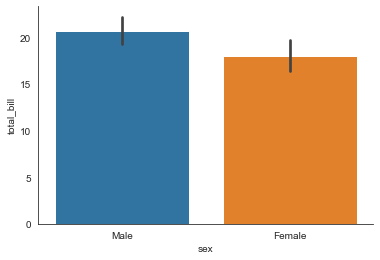

In [152]:
# barplot 
sns.barplot(data= tips, x = "sex" , y = "total_bill")
sns.despine()

<AxesSubplot:xlabel='sex', ylabel='tip'>

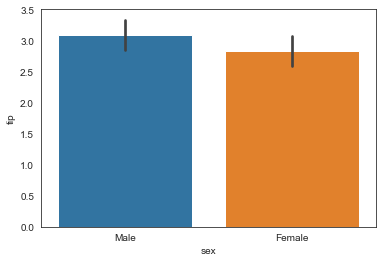

In [156]:
# for the tip column male = 3, female = 2.8
sns.barplot(data= tips, x = "sex", y= "tip")

In [157]:
# we can convert the estimator from mean to any other estimator 
tips.groupby("sex").std()

,total_bill,tip,size
sex,,,
Male,9.246469,1.489102,0.955997
Female,8.009209,1.159495,0.937644


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

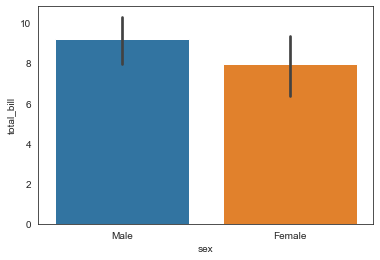

In [158]:
import numpy as np
sns.barplot(data= tips, x = "sex" , y= "total_bill", estimator= np.std)

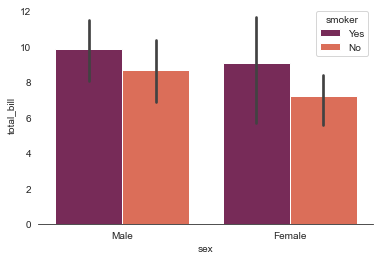

In [161]:
sns.barplot(data= tips, x= "sex", y= "total_bill" , estimator= np.std , hue = "smoker", palette="rocket")
sns.despine(left = True)

Male      157
Female     87
Name: sex, dtype: int64

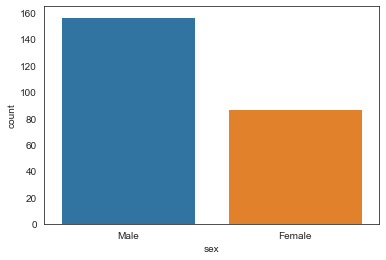

In [175]:
# the countplot is like barplot but only counts the occurance of the values 
sns.countplot(data = tips, x = "sex")
# same as 
tips["sex"].value_counts()

<AxesSubplot:xlabel='smoker', ylabel='count'>

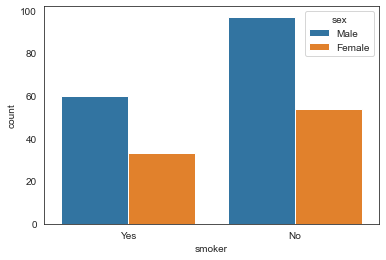

In [181]:
sns.countplot(data = tips, x = "smoker", hue = "sex" )

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

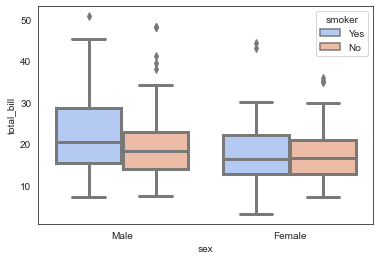

In [200]:
sns.boxplot(data = tips, x = "sex" , y = "total_bill", hue = "smoker", palette= "coolwarm", linewidth= 3)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

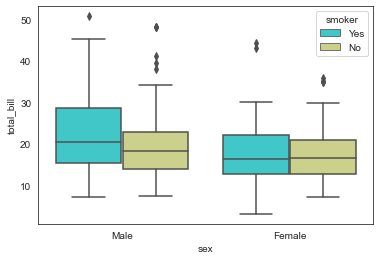

In [202]:
sns.boxplot(data = tips, x = "sex" , y = "total_bill", hue = "smoker", palette= "rainbow", linewidth= 1.5)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

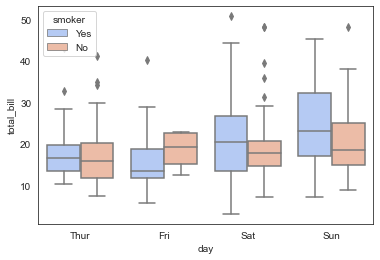

In [209]:
# cnditional boxplot
sns.boxplot(data = tips, x = "day" , y = "total_bill", hue = "smoker", palette="coolwarm")


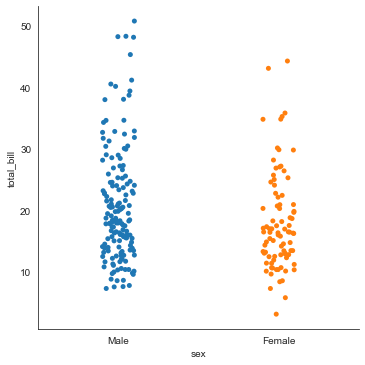

In [210]:
sns.catplot(data = tips, x = "sex" , y = "total_bill")

C:\Users\eslam\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


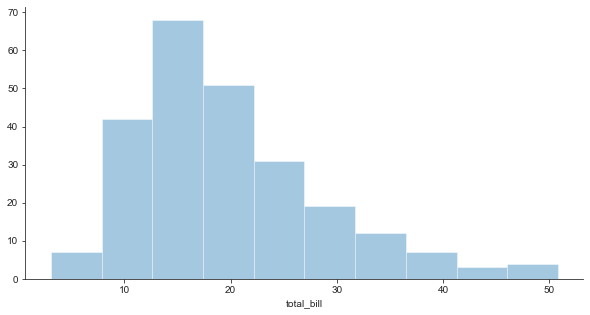

In [220]:
plt.figure(figsize= (10,5))
sns.set_style("ticks")
sns.distplot(tips["total_bill"], kde = False, bins = 10)
sns.despine()

## matrix plots 

In [222]:
# anew dataset from seaborn 
flights = sns.load_dataset("flights")
tips = sns.load_dataset("tips")

In [223]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [224]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [233]:
# your data should be in a matrix form already and heatmap colors it only 
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

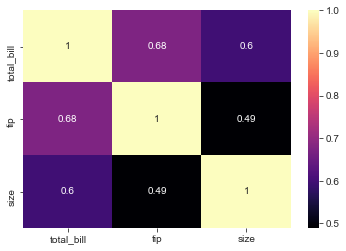

In [240]:
sns.heatmap(tips.corr(), annot= True, cmap = "magma")

In [243]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [244]:
pivot = flights.pivot_table(values='passengers',index='month',columns='year')

<AxesSubplot:xlabel='year', ylabel='month'>

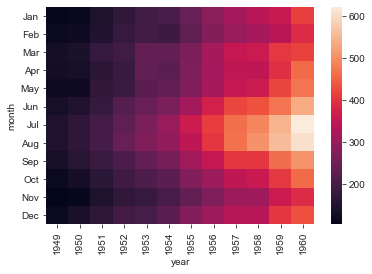

In [247]:
sns.heatmap(pivot)

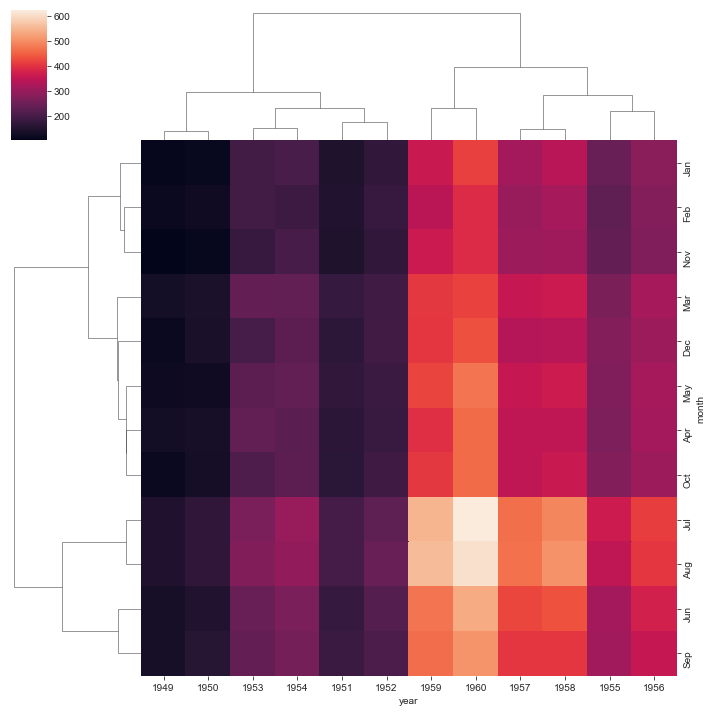

In [248]:
sns.clustermap(pivot)

## Grids 

In [250]:
# another dataset 
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [252]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

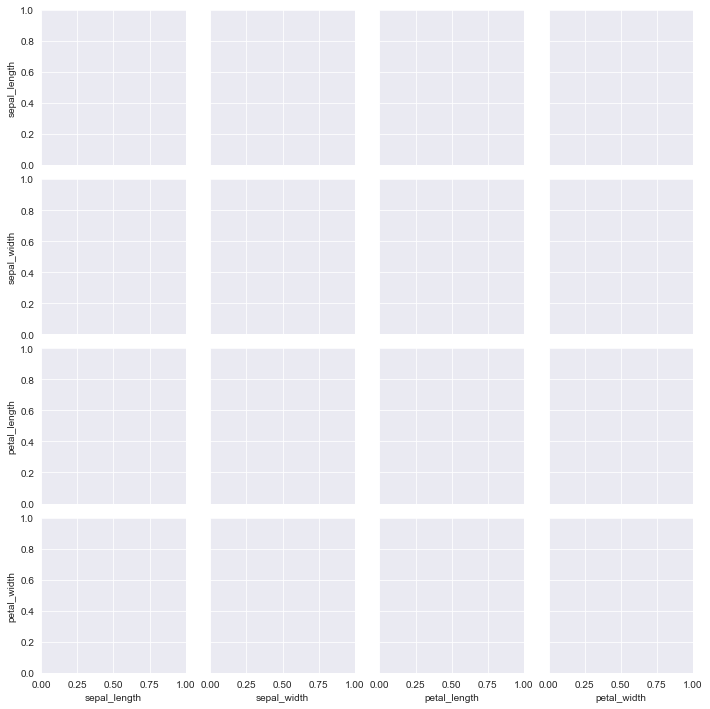

In [258]:
sns.set_style("darkgrid")
sns.PairGrid(iris)

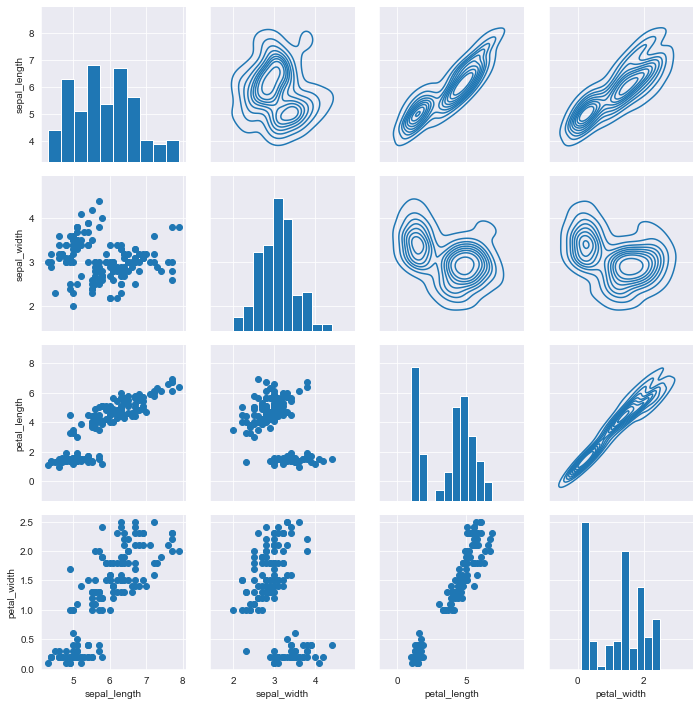

In [271]:
g = sns.PairGrid(data = iris)
g.map_diag(plt.hist)
g.map_lower(plt.scatter)
g.map_upper(sns.kdeplot)

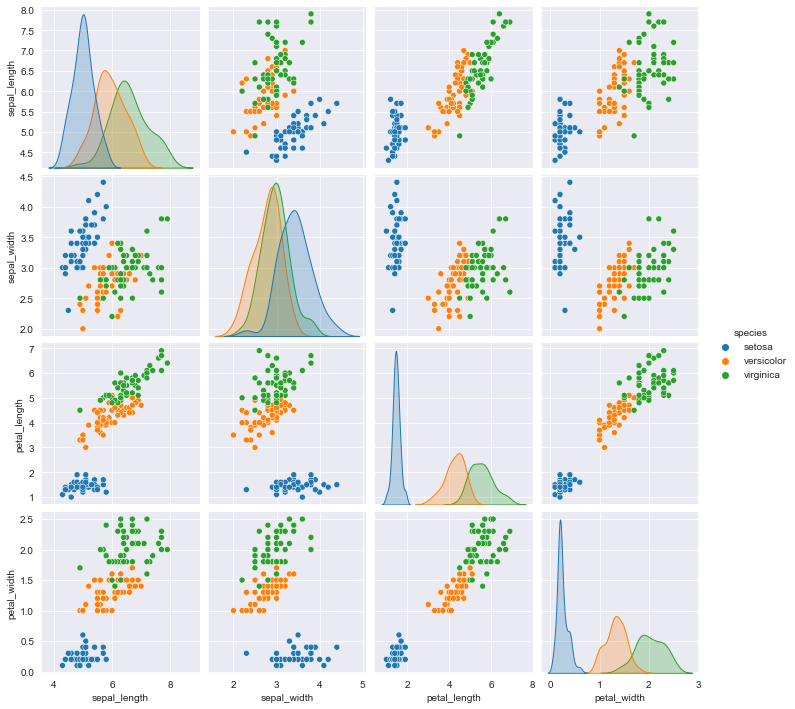

In [279]:
# pairplot is a kind of PairGrid 
sns.pairplot(iris, hue = "species")

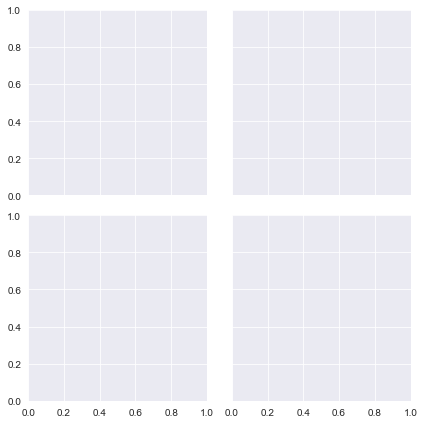

In [280]:
# FacetGrid 
sns.FacetGrid(data = tips , row='time' , col = "smoker")

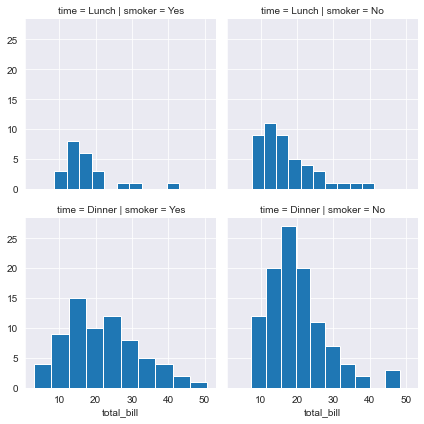

In [283]:
g = sns.FacetGrid(data = tips , row='time' , col = "smoker")
g.map(plt.hist, "total_bill")